### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.ticker import AutoLocator, AutoMinorLocator, LogLocator
import glob
from scipy.interpolate import griddata
from pathlib import Path
import h5py
import sys
from pathlib import Path
import os

# Where am I running?
try:
    # Normal script
    here = Path(__file__).resolve().parent
except NameError:
    # Notebook / REPL
    here = Path.cwd()

phys_const_path = (here / '..' / 'phys_const').resolve()
sys.path.append(str(phys_const_path))

nsm_plots_path = (here / '..' / 'nsm_plots').resolve()
sys.path.append(str(nsm_plots_path))

nsm_plots_postproc = (here / '..' / 'nsm_instabilities').resolve()
sys.path.append(str(nsm_plots_postproc))

import phys_const as pc
import plot_functions as pf

### Directory to read data

In [2]:
##################################################################################################################
# Simulation paths

##########################
# CFI simulations

directory_path = '/home/erick/gw170817_1.00ye_locsim/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1'
ncell = (1,1,1) # number of cells in each direction
domain = (1e5, 1e5, 1e5) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-100'
# ncell = (1,1,100) # number of cells in each direction
# domain = (1e5, 1e5, 1e5) # cm

############################
# FFI simulations

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/92ppeb/nsmcell_05-48-15_doma_1-1-128_cells_1-1-128'
# ncell = (1,1,128) # number of cells in each direction
# domain = (1, 1, 128) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/92ppeb/nsmcell_15-48-15_doma_1-1-128_cells_1-1-128'
# ncell = (1,1,128) # number of cells in each direction
# domain = (1, 1, 128) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/92ppeb/nsmcell_25-48-15_doma_1-1-128_cells_1-1-128'
# ncell = (1,1,128) # number of cells in each direction
# domain = (1, 1, 128) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/92ppeb/nsmcell_35-48-15_doma_1-1-128_cells_1-1-128'
# ncell = (1,1,128) # number of cells in each direction
# domain = (1, 1, 128) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/378ppeb/cell_15_48_15_d_1_1_50_c_1_1_100'
# ncell = (1, 1, 100) # number of cells in each direction
# domain = (1, 1, 50) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/378ppeb/cell_15_48_15_d_1_1_128_c_1_1_512'
# ncell = (1,1,512) # number of cells in each direction
# domain = (1, 1, 128) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/378ppeb/cell_15_48_15_d_1_1_20_c_1_1_40'
# ncell = (1, 1, 40) # number of cells in each direction
# domain = (1, 1, 20) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/1506ppeb/nsmcell_15_48_15_doma_1-1-128_cells_1-1-128'
# ncell = (1,1,128) # number of cells in each direction
# domain = (1, 1, 128) # cm

# directory_path = '/home/erick/gw170817_1.00ye_locsim/FFI/1506ppeb/nsmcell_15_48_15_doma_1-1-64_cells_1-1-128'
# ncell = (1,1,128) # number of cells in each direction
# domain = (1, 1, 64) # cm

##################################################################################################################

# Calculate the volume of a single cell and the total volume
volume_cell = (domain[0] / ncell[0]) * (domain[1] / ncell[1]) * (domain[2] / ncell[2]) # cm^3
volume = volume_cell * (ncell[0] * ncell[1] * ncell[2]) # cm^3

# Load the list of .plt files
plt_files_list = glob.glob(directory_path + '/plt*.h5')
plt_files_list.sort(key=lambda x: int(x.split('plt')[1].split('.h5')[0]))
print(f"Number of files: {len(plt_files_list)}")
print(f"First plt file: {plt_files_list[0]}")
print(f"Last plt file: {plt_files_list[-1]}")

Number of files: 801
First plt file: /home/erick/gw170817_1.00ye_locsim/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt00000.h5
Last plt file: /home/erick/gw170817_1.00ye_locsim/CFI/cell_32-48-15_dom_1-1-1_km_ncell_1-1-1/plt800000.h5


### Compute and plot average number densities from particle data

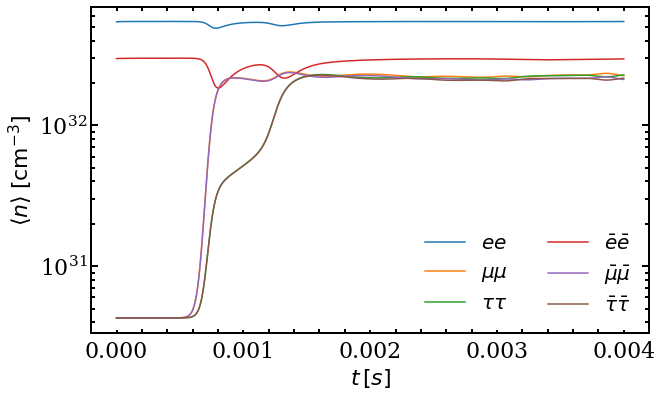

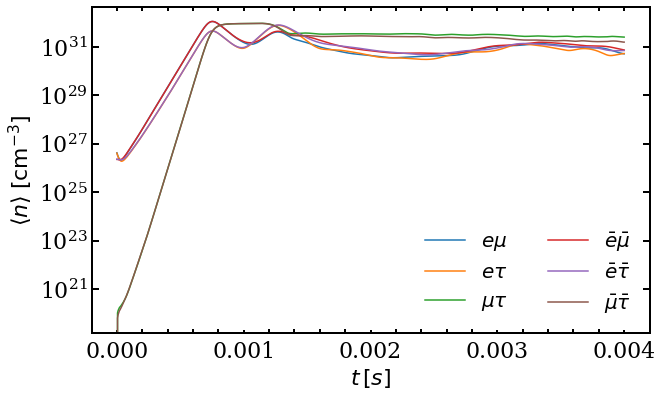

n_ee_ave_inv_ccm[0] = 5.4370643905720965e+32 cm^-3, n_ee_ave_inv_ccm[-1] = 5.471626724511783e+32 cm^-3
n_uu_ave_inv_ccm[0] = 4.2829329120007566e+30 cm^-3, n_uu_ave_inv_ccm[-1] = 2.257897802338171e+32 cm^-3
n_tt_ave_inv_ccm[0] = 4.2829329120007566e+30 cm^-3, n_tt_ave_inv_ccm[-1] = 2.285992907349802e+32 cm^-3
n_eu_ave_inv_ccm[0] = 4.141960876342863e+26 cm^-3, n_eu_ave_inv_ccm[-1] = 5.0206578312275957e+30 cm^-3
n_et_ave_inv_ccm[0] = 4.023974206619328e+26 cm^-3, n_et_ave_inv_ccm[-1] = 5.169061352049785e+30 cm^-3
n_ut_ave_inv_ccm[0] = 0.0 cm^-3, n_ut_ave_inv_ccm[-1] = 2.45822415795011e+31 cm^-3
nbar_ee_ave_inv_ccm[0] = 2.9859259033396775e+32 cm^-3, nbar_ee_ave_inv_ccm[-1] = 2.968691170770609e+32 cm^-3
nbar_uu_ave_inv_ccm[0] = 4.2829329120007566e+30 cm^-3, nbar_uu_ave_inv_ccm[-1] = 2.120594376248461e+32 cm^-3
nbar_tt_ave_inv_ccm[0] = 4.2829329120007566e+30 cm^-3, nbar_tt_ave_inv_ccm[-1] = 2.165580846857432e+32 cm^-3
nbar_eu_ave_inv_ccm[0] = 2.2224891403691385e+26 cm^-3, nbar_eu_ave_inv_ccm[-

In [3]:
n_ee_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_uu_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_tt_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_eu_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_et_ave_inv_ccm    = np.zeros(len(plt_files_list))
n_ut_ave_inv_ccm    = np.zeros(len(plt_files_list))

nbar_ee_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_uu_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_tt_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_eu_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_et_ave_inv_ccm = np.zeros(len(plt_files_list))
nbar_ut_ave_inv_ccm = np.zeros(len(plt_files_list))

time_s              = np.zeros(len(plt_files_list))

for idx, plt_file_name in enumerate(plt_files_list):
    
    with h5py.File(plt_file_name, 'r') as f:

        data_dict = {}
        for key in f.keys():
            data_dict[key] = np.array(f[key][:])
    
        time_s[idx] = data_dict['time'][0]

        n_ee_ave_inv_ccm[idx] = np.sum(data_dict['N00_Re']) / volume
        n_uu_ave_inv_ccm[idx] = np.sum(data_dict['N11_Re']) / volume
        n_tt_ave_inv_ccm[idx] = np.sum(data_dict['N22_Re']) / volume
        n_eu_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N01_Re']**2 + data_dict['N01_Im']**2 ) ) / volume
        n_et_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N02_Re']**2 + data_dict['N02_Im']**2 ) ) / volume
        n_ut_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N12_Re']**2 + data_dict['N12_Im']**2 ) ) / volume

        nbar_ee_ave_inv_ccm[idx] = np.sum(data_dict['N00_Rebar']) / volume
        nbar_uu_ave_inv_ccm[idx] = np.sum(data_dict['N11_Rebar']) / volume
        nbar_tt_ave_inv_ccm[idx] = np.sum(data_dict['N22_Rebar']) / volume
        nbar_eu_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N01_Rebar']**2 + data_dict['N01_Imbar']**2 ) ) / volume
        nbar_et_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N02_Rebar']**2 + data_dict['N02_Imbar']**2 ) ) / volume
        nbar_ut_ave_inv_ccm[idx] = np.sum( np.sqrt( data_dict['N12_Rebar']**2 + data_dict['N12_Imbar']**2 ) ) / volume

# Plotting the average number densities from particle data

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_s, n_ee_ave_inv_ccm, label=r'$ee$')
ax.plot(time_s, n_uu_ave_inv_ccm, label=r'$\mu\mu$')
ax.plot(time_s, n_tt_ave_inv_ccm, label=r'$\tau\tau$')

ax.plot(time_s, nbar_ee_ave_inv_ccm, label=r'$\bar{e}\bar{e}$')
ax.plot(time_s, nbar_uu_ave_inv_ccm, label=r'$\bar{\mu}\bar{\mu}$')
ax.plot(time_s, nbar_tt_ave_inv_ccm, label=r'$\bar{\tau}\bar{\tau}$')

ax.set_xlabel(r'$t \, [s]$')
ax.set_ylabel(r'$\langle n \rangle \; [\mathrm{cm}^{-3}]$')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
pf.apply_custom_settings(ax, leg, True)
plt.savefig(f"plots/{directory_path.split('/')[-1]}_n_average_particles.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)





fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_s, n_eu_ave_inv_ccm, label=r'$e\mu$')
ax.plot(time_s, n_et_ave_inv_ccm, label=r'$e\tau$')
ax.plot(time_s, n_ut_ave_inv_ccm, label=r'$\mu\tau$')

ax.plot(time_s, nbar_eu_ave_inv_ccm, label=r'$\bar{e}\bar{\mu}$')
ax.plot(time_s, nbar_et_ave_inv_ccm, label=r'$\bar{e}\bar{\tau}$')
ax.plot(time_s, nbar_ut_ave_inv_ccm, label=r'$\bar{\mu}\bar{\tau}$')

ax.set_xlabel(r'$t \, [s]$')
ax.set_ylabel(r'$\langle n \rangle \; [\mathrm{cm}^{-3}]$')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
pf.apply_custom_settings(ax, leg, True)
plt.savefig(f"plots/{directory_path.split('/')[-1]}_n_average_particles.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

print(f"n_ee_ave_inv_ccm[0] = {n_ee_ave_inv_ccm[0]} cm^-3, n_ee_ave_inv_ccm[-1] = {n_ee_ave_inv_ccm[-1]} cm^-3")
print(f"n_uu_ave_inv_ccm[0] = {n_uu_ave_inv_ccm[0]} cm^-3, n_uu_ave_inv_ccm[-1] = {n_uu_ave_inv_ccm[-1]} cm^-3")
print(f"n_tt_ave_inv_ccm[0] = {n_tt_ave_inv_ccm[0]} cm^-3, n_tt_ave_inv_ccm[-1] = {n_tt_ave_inv_ccm[-1]} cm^-3")
print(f"n_eu_ave_inv_ccm[0] = {n_eu_ave_inv_ccm[0]} cm^-3, n_eu_ave_inv_ccm[-1] = {n_eu_ave_inv_ccm[-1]} cm^-3")
print(f"n_et_ave_inv_ccm[0] = {n_et_ave_inv_ccm[0]} cm^-3, n_et_ave_inv_ccm[-1] = {n_et_ave_inv_ccm[-1]} cm^-3")
print(f"n_ut_ave_inv_ccm[0] = {n_ut_ave_inv_ccm[0]} cm^-3, n_ut_ave_inv_ccm[-1] = {n_ut_ave_inv_ccm[-1]} cm^-3")

print(f"nbar_ee_ave_inv_ccm[0] = {nbar_ee_ave_inv_ccm[0]} cm^-3, nbar_ee_ave_inv_ccm[-1] = {nbar_ee_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_uu_ave_inv_ccm[0] = {nbar_uu_ave_inv_ccm[0]} cm^-3, nbar_uu_ave_inv_ccm[-1] = {nbar_uu_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_tt_ave_inv_ccm[0] = {nbar_tt_ave_inv_ccm[0]} cm^-3, nbar_tt_ave_inv_ccm[-1] = {nbar_tt_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_eu_ave_inv_ccm[0] = {nbar_eu_ave_inv_ccm[0]} cm^-3, nbar_eu_ave_inv_ccm[-1] = {nbar_eu_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_et_ave_inv_ccm[0] = {nbar_et_ave_inv_ccm[0]} cm^-3, nbar_et_ave_inv_ccm[-1] = {nbar_et_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_ut_ave_inv_ccm[0] = {nbar_ut_ave_inv_ccm[0]} cm^-3, nbar_ut_ave_inv_ccm[-1] = {nbar_ut_ave_inv_ccm[-1]} cm^-3")


### Compute and plot average number densities from mesh data

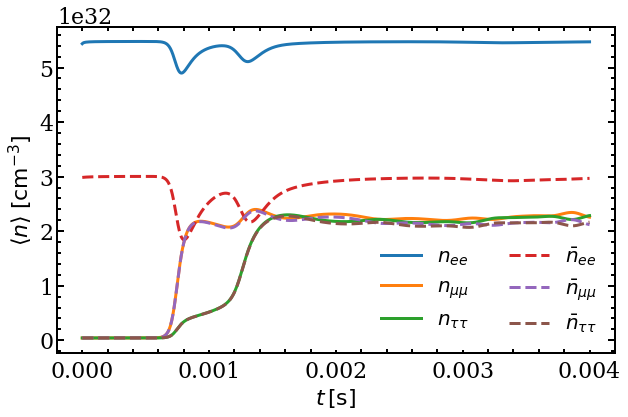

/tmp/ipykernel_562056/3881626728.py:74: RuntimeWarning: divide by zero encountered in log10
  ax.plot(time_s, np.log10(n_ut_ave_inv_ccm), label=r'$n_{\mu\tau}$', linewidth=3)
/tmp/ipykernel_562056/3881626728.py:78: RuntimeWarning: divide by zero encountered in log10
  ax.plot(time_s, np.log10(nbar_ut_ave_inv_ccm), label=r'$\bar{n}_{\mu\tau}$', linestyle='--', linewidth=3)


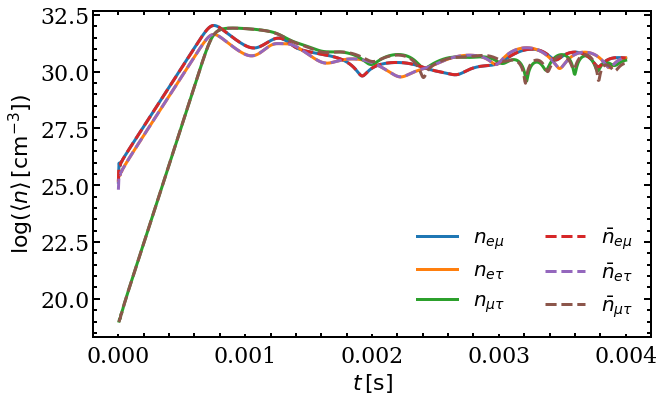

n_ee_ave_inv_ccm[0] 5.437064390572067e+32 cm^-3 | n_ee_ave_inv_ccm[-1] 5.471626726457948e+32 cm^-3
n_uu_ave_inv_ccm[0] 4.2829329120007386e+30 cm^-3 | n_uu_ave_inv_ccm[-1] 2.2578978014564515e+32 cm^-3
n_tt_ave_inv_ccm[0] 4.2829329120007374e+30 cm^-3 | n_tt_ave_inv_ccm[-1] 2.2859929062856994e+32 cm^-3
n_eu_ave_inv_ccm[0] 1.3577613162069364e+25 cm^-3 | n_eu_ave_inv_ccm[-1] 3.9585305943372075e+30 cm^-3
n_et_ave_inv_ccm[0] 1.5799115059342204e+25 cm^-3 | n_et_ave_inv_ccm[-1] 4.0570981280806055e+30 cm^-3
n_ut_ave_inv_ccm[0] 0.0 cm^-3 | n_ut_ave_inv_ccm[-1] 3.1881160903398667e+30 cm^-3
nbar_ee_ave_inv_ccm[0] 2.985925903339679e+32 cm^-3 | nbar_ee_ave_inv_ccm[-1] 2.968691172716681e+32 cm^-3
nbar_uu_ave_inv_ccm[0] 4.282932912000763e+30 cm^-3 | nbar_uu_ave_inv_ccm[-1] 2.1205943753667427e+32 cm^-3
nbar_tt_ave_inv_ccm[0] 4.282932912000761e+30 cm^-3 | nbar_tt_ave_inv_ccm[-1] 2.1655808457931514e+32 cm^-3
nbar_eu_ave_inv_ccm[0] 1.558969112077407e+25 cm^-3 | nbar_eu_ave_inv_ccm[-1] 3.979738393214724e+30

In [4]:
all_data_path = os.path.join(directory_path, 'allData.h5')
with h5py.File(all_data_path, 'r') as all_data_file:
    
    nee =  np.array(all_data_file['/N00_Re(1|ccm)'][:])
    nuu =  np.array(all_data_file['/N11_Re(1|ccm)'][:])
    ntt =  np.array(all_data_file['/N22_Re(1|ccm)'][:])
    neu =  np.sqrt(np.array(all_data_file['/N01_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N01_Im(1|ccm)'][:])**2)
    neu_im = np.array(all_data_file['/N01_Im(1|ccm)'][:])
    neu_re = np.array(all_data_file['/N01_Re(1|ccm)'][:])
    net =  np.sqrt(np.array(all_data_file['/N02_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N02_Im(1|ccm)'][:])**2)
    net_im = np.array(all_data_file['/N02_Im(1|ccm)'][:])
    net_re = np.array(all_data_file['/N02_Re(1|ccm)'][:])
    nut = np.sqrt(np.array(all_data_file['/N12_Re(1|ccm)'][:])**2.0 + np.array(all_data_file['/N12_Im(1|ccm)'][:])**2)
    nut_im = np.array(all_data_file['/N12_Im(1|ccm)'][:])
    nut_re = np.array(all_data_file['/N12_Re(1|ccm)'][:])

    nbar_ee = np.array(all_data_file['/N00_Rebar(1|ccm)'][:])
    nbar_uu = np.array(all_data_file['/N11_Rebar(1|ccm)'][:])
    nbar_tt = np.array(all_data_file['/N22_Rebar(1|ccm)'][:])
    nbar_eu = np.sqrt(np.array(all_data_file['/N01_Rebar(1|ccm)'][:])**2.0 + np.array(all_data_file['/N01_Imbar(1|ccm)'][:])**2)
    nbar_eu_im = np.array(all_data_file['/N01_Imbar(1|ccm)'][:])
    nbar_eu_re = np.array(all_data_file['/N01_Rebar(1|ccm)'][:])
    nbar_et = np.sqrt(np.array(all_data_file['/N02_Rebar(1|ccm)'][:])**2.0 + np.array(all_data_file['/N02_Imbar(1|ccm)'][:])**2)
    nbar_et_im = np.array(all_data_file['/N02_Imbar(1|ccm)'][:])
    nbar_et_re = np.array(all_data_file['/N02_Rebar(1|ccm)'][:])
    nbar_ut = np.sqrt(np.array(all_data_file['/N12_Rebar(1|ccm)'][:])**2.0 + np.array(all_data_file['/N12_Imbar(1|ccm)'][:])**2)
    nbar_ut_im = np.array(all_data_file['/N12_Imbar(1|ccm)'][:])
    nbar_ut_re = np.array(all_data_file['/N12_Rebar(1|ccm)'][:])

    n_ee_ave_inv_ccm = np.mean(nee, axis=tuple(range(1, nee.ndim)))
    n_uu_ave_inv_ccm = np.mean(nuu, axis=tuple(range(1, nuu.ndim)))
    n_tt_ave_inv_ccm = np.mean(ntt, axis=tuple(range(1, ntt.ndim)))
    n_eu_ave_inv_ccm = np.mean(neu, axis=tuple(range(1, neu.ndim)))
    n_et_ave_inv_ccm = np.mean(net, axis=tuple(range(1, net.ndim)))
    n_ut_ave_inv_ccm = np.mean(nut, axis=tuple(range(1, nut.ndim)))

    nbar_ee_ave_inv_ccm = np.mean(nbar_ee, axis=tuple(range(1, nbar_ee.ndim)))
    nbar_uu_ave_inv_ccm = np.mean(nbar_uu, axis=tuple(range(1, nbar_uu.ndim)))
    nbar_tt_ave_inv_ccm = np.mean(nbar_tt, axis=tuple(range(1, nbar_tt.ndim)))
    nbar_eu_ave_inv_ccm = np.mean(nbar_eu, axis=tuple(range(1, nbar_eu.ndim)))
    nbar_et_ave_inv_ccm = np.mean(nbar_et, axis=tuple(range(1, nbar_et.ndim)))
    nbar_ut_ave_inv_ccm = np.mean(nbar_ut, axis=tuple(range(1, nbar_ut.ndim)))

    time_s = np.array(all_data_file['/t(s)'][:])

###################################################################################
# PLOT DIAGONALS AVERAGE NUMBER DENSITIES

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_s, n_ee_ave_inv_ccm, label=r'$n_{ee}$', linewidth=3)
ax.plot(time_s, n_uu_ave_inv_ccm, label=r'$n_{\mu\mu}$', linewidth=3)
ax.plot(time_s, n_tt_ave_inv_ccm, label=r'$n_{\tau\tau}$', linewidth=3)

ax.plot(time_s, nbar_ee_ave_inv_ccm, label=r'$\bar{n}_{ee}$', linestyle='--', linewidth=3)
ax.plot(time_s, nbar_uu_ave_inv_ccm, label=r'$\bar{n}_{\mu\mu}$', linestyle='--', linewidth=3)
ax.plot(time_s, nbar_tt_ave_inv_ccm, label=r'$\bar{n}_{\tau\tau}$', linestyle='--', linewidth=3)

ax.set_xlabel(r'$t \, [\mathrm{s}]$')
ax.set_ylabel(r'$\langle n \rangle \; [\mathrm{cm}^{-3}]$')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
pf.apply_custom_settings(ax, leg, False)
plt.savefig(f"plots/{directory_path.split('/')[-1]}_n_average_diagonal_meshdata.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

###################################################################################
# PLOT OFF-DIAGONALS AVERAGE NUMBER DENSITIES

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_s, np.log10(n_eu_ave_inv_ccm), label=r'$n_{e\mu}$', linewidth=3)
ax.plot(time_s, np.log10(n_et_ave_inv_ccm), label=r'$n_{e\tau}$', linewidth=3)
ax.plot(time_s, np.log10(n_ut_ave_inv_ccm), label=r'$n_{\mu\tau}$', linewidth=3)

ax.plot(time_s, np.log10(nbar_eu_ave_inv_ccm), label=r'$\bar{n}_{e\mu}$', linestyle='--', linewidth=3)
ax.plot(time_s, np.log10(nbar_et_ave_inv_ccm), label=r'$\bar{n}_{e\tau}$', linestyle='--', linewidth=3)
ax.plot(time_s, np.log10(nbar_ut_ave_inv_ccm), label=r'$\bar{n}_{\mu\tau}$', linestyle='--', linewidth=3)

ax.set_xlabel(r'$t \, [\mathrm{s}]$')
ax.set_ylabel(r'$\log(\langle n \rangle \, [\mathrm{cm}^{-3}])$')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=20)
pf.apply_custom_settings(ax, leg, False)
plt.savefig(f"plots/{directory_path.split('/')[-1]}_n_average_offdiagonal_meshdata.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

###############################################################################################
# Saving data for plots in HDF5 format

with h5py.File(f"plots/{directory_path.split('/')[-1]}_n_average_time_evolution.h5", "w") as hf:
    hf.create_dataset("time_s", data=time_s)
    hf.create_dataset("n_ee_ave_inv_ccm", data=n_ee_ave_inv_ccm)
    hf.create_dataset("n_uu_ave_inv_ccm", data=n_uu_ave_inv_ccm)
    hf.create_dataset("n_tt_ave_inv_ccm", data=n_tt_ave_inv_ccm)
    hf.create_dataset("n_eu_ave_inv_ccm", data=n_eu_ave_inv_ccm)
    hf.create_dataset("n_et_ave_inv_ccm", data=n_et_ave_inv_ccm)
    hf.create_dataset("n_ut_ave_inv_ccm", data=n_ut_ave_inv_ccm)
    hf.create_dataset("nbar_ee_ave_inv_ccm", data=nbar_ee_ave_inv_ccm)
    hf.create_dataset("nbar_uu_ave_inv_ccm", data=nbar_uu_ave_inv_ccm)
    hf.create_dataset("nbar_tt_ave_inv_ccm", data=nbar_tt_ave_inv_ccm)
    hf.create_dataset("nbar_eu_ave_inv_ccm", data=nbar_eu_ave_inv_ccm)
    hf.create_dataset("nbar_et_ave_inv_ccm", data=nbar_et_ave_inv_ccm)
    hf.create_dataset("nbar_ut_ave_inv_ccm", data=nbar_ut_ave_inv_ccm)

###############################################################################################
# PRINT INITIAL AND FINAL AVERAGE NUMBER DENSITIES

print(f"n_ee_ave_inv_ccm[0] {n_ee_ave_inv_ccm[0]} cm^-3 | n_ee_ave_inv_ccm[-1] {n_ee_ave_inv_ccm[-1]} cm^-3")
print(f"n_uu_ave_inv_ccm[0] {n_uu_ave_inv_ccm[0]} cm^-3 | n_uu_ave_inv_ccm[-1] {n_uu_ave_inv_ccm[-1]} cm^-3")
print(f"n_tt_ave_inv_ccm[0] {n_tt_ave_inv_ccm[0]} cm^-3 | n_tt_ave_inv_ccm[-1] {n_tt_ave_inv_ccm[-1]} cm^-3")
print(f"n_eu_ave_inv_ccm[0] {n_eu_ave_inv_ccm[0]} cm^-3 | n_eu_ave_inv_ccm[-1] {n_eu_ave_inv_ccm[-1]} cm^-3")
print(f"n_et_ave_inv_ccm[0] {n_et_ave_inv_ccm[0]} cm^-3 | n_et_ave_inv_ccm[-1] {n_et_ave_inv_ccm[-1]} cm^-3")
print(f"n_ut_ave_inv_ccm[0] {n_ut_ave_inv_ccm[0]} cm^-3 | n_ut_ave_inv_ccm[-1] {n_ut_ave_inv_ccm[-1]} cm^-3")

print(f"nbar_ee_ave_inv_ccm[0] {nbar_ee_ave_inv_ccm[0]} cm^-3 | nbar_ee_ave_inv_ccm[-1] {nbar_ee_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_uu_ave_inv_ccm[0] {nbar_uu_ave_inv_ccm[0]} cm^-3 | nbar_uu_ave_inv_ccm[-1] {nbar_uu_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_tt_ave_inv_ccm[0] {nbar_tt_ave_inv_ccm[0]} cm^-3 | nbar_tt_ave_inv_ccm[-1] {nbar_tt_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_eu_ave_inv_ccm[0] {nbar_eu_ave_inv_ccm[0]} cm^-3 | nbar_eu_ave_inv_ccm[-1] {nbar_eu_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_et_ave_inv_ccm[0] {nbar_et_ave_inv_ccm[0]} cm^-3 | nbar_et_ave_inv_ccm[-1] {nbar_et_ave_inv_ccm[-1]} cm^-3")
print(f"nbar_ut_ave_inv_ccm[0] {nbar_ut_ave_inv_ccm[0]} cm^-3 | nbar_ut_ave_inv_ccm[-1] {nbar_ut_ave_inv_ccm[-1]} cm^-3")

# ####################################################
# # COMPUTE SLOPE OF THE AVERAGE NUMBER DENSITY
# ####################################################

# tiempo   = time_s[100:400]
# funcion  = n_eu_ave_inv_ccm[100:400]
# b, ln_a = np.polyfit(tiempo, np.log(funcion), deg=1)
# a       = np.exp(ln_a)
# print(f"Fitted exponential parameters a e^ bt:")
# print(f"a = {a:.3e}, b = {b:.3e}")

# # 3.  Plot (original scale, log‐y)
# plt.figure(figsize=(10, 6))
# plt.plot(time_s, n_eu_ave_inv_ccm)
# plt.plot(tiempo, a * np.exp(b * tiempo), 'r-',
#          label=fr'Fit: $a e^{{bt}}$' + f'\n$b={b:.3e}$')
# plt.xlabel(r'$t\;[\mathrm{s}]$')
# plt.ylabel(r'$\langle n_{e\mu}\rangle\;[\mathrm{cm}^{-3}]$')
# plt.yscale('log')
# plt.legend()
# plt.tight_layout()
# plt.show()

### Plot number densitites as a function of space and with a color bar the time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


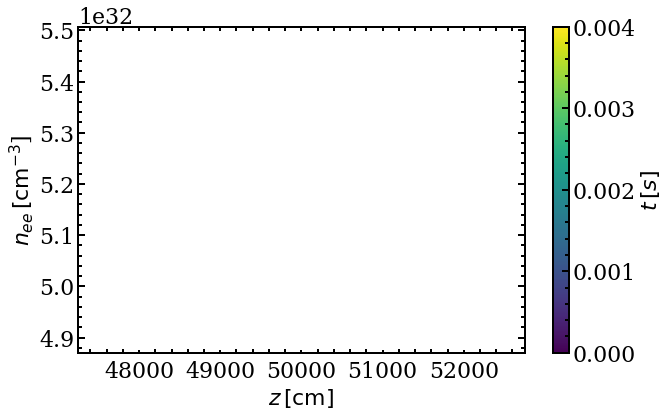

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


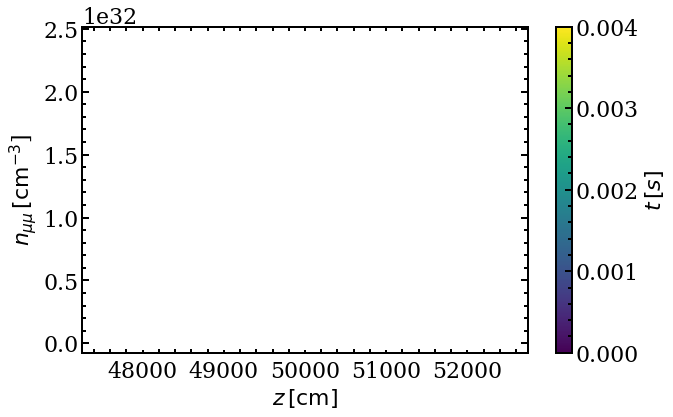

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


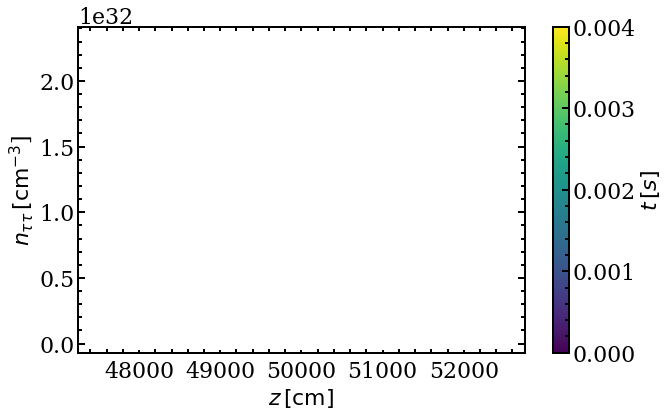

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


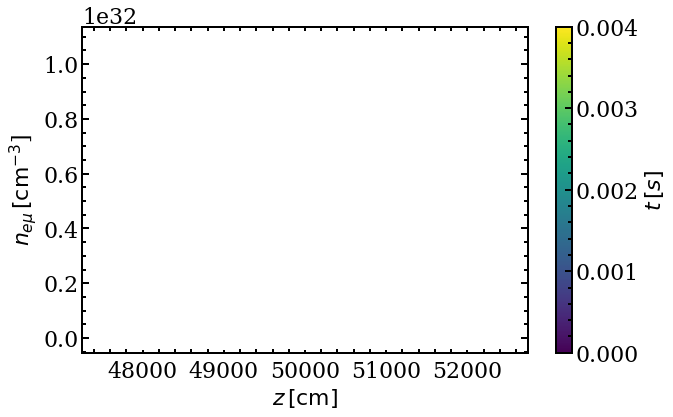

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


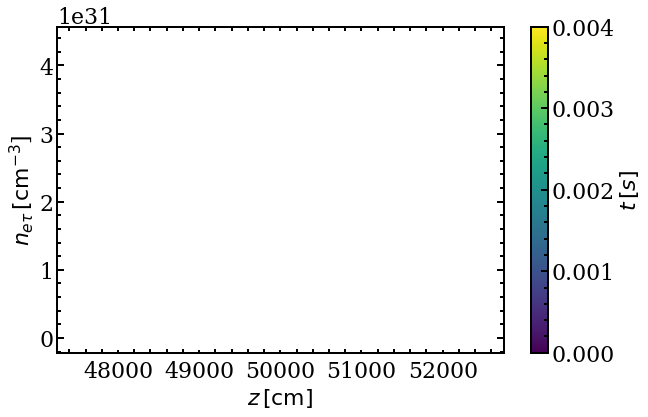

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


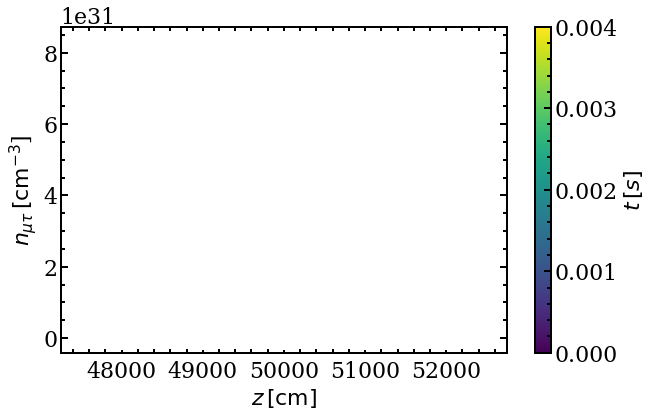

In [5]:
z_cell_centers = np.arange(domain[2] / ncell[2] / 2, domain[2], domain[2] / ncell[2])

pf.plot_colored_lines(z_cell_centers, nee[:,0,0,:], time_s, r'$z \, [\mathrm{cm}]$', r'$n_{ee} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_ee_space.pdf")
pf.plot_colored_lines(z_cell_centers, nuu[:,0,0,:], time_s, r'$z \, [\mathrm{cm}]$', r'$n_{\mu\mu} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_mumu_space.pdf")
pf.plot_colored_lines(z_cell_centers, ntt[:,0,0,:], time_s, r'$z \, [\mathrm{cm}]$', r'$n_{\tau\tau} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_tautau_space.pdf")
pf.plot_colored_lines(z_cell_centers, neu[:,0,0,:], time_s, r'$z \, [\mathrm{cm}]$', r'$n_{e\mu} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_eu_space.pdf")
pf.plot_colored_lines(z_cell_centers, net[:,0,0,:], time_s, r'$z \, [\mathrm{cm}]$', r'$n_{e\tau} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_et_space.pdf")
pf.plot_colored_lines(z_cell_centers, nut[:,0,0,:], time_s, r'$z \, [\mathrm{cm}]$', r'$n_{\mu\tau} \, [\mathrm{cm}^{-3}$]', r'$t \, [s]$', f"plots/{directory_path.split('/')[-1]}_n_ut_space.pdf")

### Write a function that performs the Fourier transform of some data
### Also test this function to verify that the Fourier transform of a Gaussian remains a Gaussian

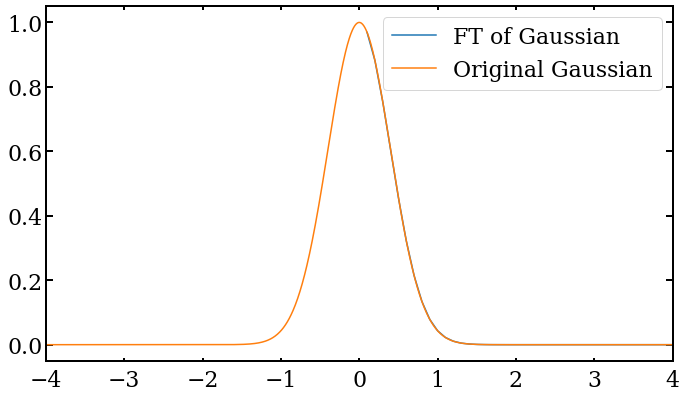

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifftshift

def do_FT(x, f_x, complex_FT=False):

    N = len(x) # Number of sample points
    dx = x[1] - x[0] # Grid spacing cm

    # ----- Compute Fourier Transform -----
    f_x_shifted = ifftshift(f_x)        # Shift for FFT
    f_k = fftshift(fft(f_x_shifted)) * dx  # FFT and scaling

    # ----- Compute wave numbers (k_x) -----
    k_x = fftshift(fftfreq(N, d=dx)) * 2 * np.pi  # f=2pi/lambda : Angular frequency in rad/cm

    # Only keep positive k_x and corresponding f_k
    if complex_FT==False:
        mask = k_x > 0
        k_x = k_x[mask]
        f_k = f_k[mask]

    return k_x, f_k

####################################################
# Test Fourier Transform with a Gaussian function
####################################################

N = 2048           # Number of sample points
L = 10.0           # Width of the domain

x = np.linspace(-L/2, L/2, N, endpoint=False)
f = np.exp(-np.pi * x**2)

# Compute Fourier Transform
kx, fk = do_FT(x, f)
labmda_x = 2 * np.pi / kx  # Wavelength in cm

# ----- Plot the magnitude of the FT -----
plt.figure(figsize=(10, 6))
plt.plot(kx/(2*np.pi), np.abs(fk), label='FT of Gaussian')
plt.plot(x, f, label='Original Gaussian')
plt.xlim(-4, 4)
plt.legend()
plt.tight_layout()
plt.show()

####################################################
# Compute Fourier Transform in space for multiple files
####################################################

time_fft = time_s.copy()

def ComputeMultipleFurier(n, complex_FFT=False):

    wavelengths   = []
    f_wavelengths = []

    for i in range(neu.shape[0]):

        x = np.arange(domain[2] / ncell[2] / 2, domain[2], domain[2] / ncell[2]) # cm
        f_x = n[i,0,0,:] # 1/ccm

        kx, fk = do_FT(x, f_x, complex_FFT)
        labmda_x = 2 * np.pi / kx  # Wavelength in cm

        wavelengths.append(labmda_x)
        f_wavelengths.append(np.abs(fk))

    wavelengths = np.array(wavelengths)
    f_wavelengths = np.array(f_wavelengths)

    return wavelengths, f_wavelengths

### Do a furier decomposition of flavor wavelength in space

In [7]:
lambda_cm, f_lambda_cm = ComputeMultipleFurier(neu_re+1.0j*neu_im, complex_FFT=True)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=np.log10(f_lambda_cm),
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\log(\,\mathcal{F}\,\{n_{e\mu}\} \, [\mathrm{cm}^{-2}]\,)$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_eu_complex_furier_space_invlambda.pdf",
    xlog=False,
    ylog=False
)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{n_{e\mu}\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_log_n_eu_complex_furier_space_invlambda.pdf",
    xlog=False,
    ylog=False
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(neu_re)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{\mathrm{Re}(n_{e\mu})\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_eu_re_furier_space_invlambda.pdf",
    xlog=False,
    ylog=False
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=neu_im)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{\mathrm{Im}(n_{e\mu})\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_eu_im_furier_space_invlambda.pdf"
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=neu)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{|n_{e\mu}|\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_eu_abs_furier_space_invlambda.pdf"
)


lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=net)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{|n_{e\tau}|\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_et_abs_furier_space_invlambda.pdf"
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=nut)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{|n_{\mu\tau}|\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_ut_abs_furier_space_invlambda.pdf"
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=nee)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{n_{ee}\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_ee_furier_space_invlambda.pdf"
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=nuu)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{n_{\mu\mu}\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_uu_furier_space_invlambda.pdf"
)

lambda_cm, f_lambda_cm = ComputeMultipleFurier(n=ntt)
pf.plot_colored_lines(
    x=1 / lambda_cm[0],
    y=f_lambda_cm,
    time_s=time_fft,
    xlabel=r'$\lambda^{-1}\,[cm^{-1}]$',
    ylabel=r'$\mathcal{F}\,\{n_{\tau\tau}\} \, [\mathrm{cm}^{-2}]$',
    cbarlabel=r'$t \, [s]$',
    filename=f"plots/{directory_path.split('/')[-1]}_n_tt_furier_space_invlambda.pdf"
)

IndexError: index 1 is out of bounds for axis 0 with size 1